In [47]:
import pandas as pd
global_temp = pd.read_csv("weatherHistory.csv")
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(96453, 12)
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64

In [48]:
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)

In [49]:
import pandas as pd

def converttemp(x):
    return (x * 1.8) + 32

def wrangle(df):
    df["Temperature (C)"] = df["Temperature (C)"].apply(converttemp)
    df["Apparent Temperature (C)"] = df["Apparent Temperature (C)"].apply(converttemp)

    df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)

    df["Month"] = df["Formatted Date"].dt.month
    df["Year"] = df["Formatted Date"].dt.year

   
    df = df.drop(["Formatted Date", "Month"], axis=1)

    df = df[df["Year"] >= 2000]

    df = df.set_index("Year")

    df = df.dropna()

    return df


df = pd.read_csv("weatherHistory.csv")

cleaned_df = wrangle(df)


print(cleaned_df.head())


            Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
Year                                                                         
2006  Partly Cloudy        rain            49.05                     45.30   
2006  Partly Cloudy        rain            48.84                     45.01   
2006  Mostly Cloudy        rain            48.88                     48.88   
2006  Partly Cloudy        rain            46.92                     42.70   
2006  Mostly Cloudy        rain            47.76                     44.56   

      Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
Year                                                                         
2006      0.89            14.1197                   251.0          15.8263   
2006      0.86            14.2646                   259.0          15.8263   
2006      0.89             3.9284                   204.0          14.9569   
2006      0.83            14.1036                   269.0      

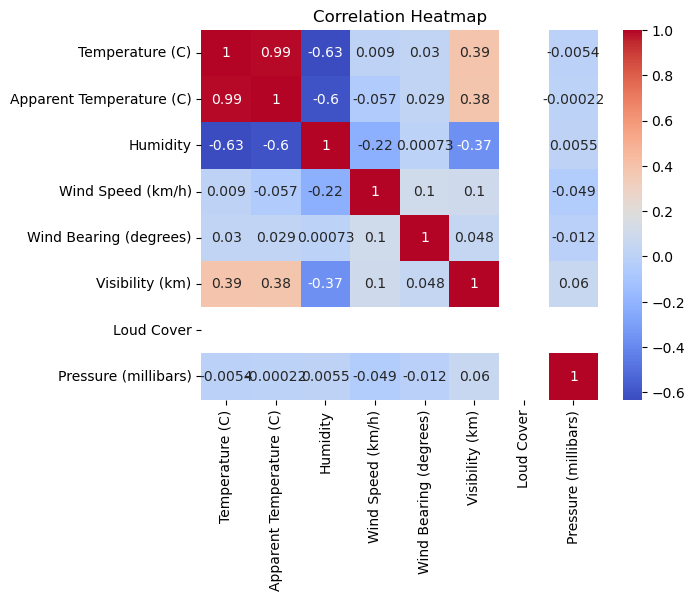

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = global_temp.select_dtypes(include='number').corr()


sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [51]:
target = "Temperature (C)"
y = global_temp[target]
x = global_temp[["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)"]]
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(72339, 3)
(24114, 3)
(72339,)
(24114,)


In [52]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
print("Baseline MAE: ", round(mean_squared_error(ytrain, ypred), 5))

Baseline MAE:  91.12289


In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
forest.fit(xtrain, ytrain)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming you already have x (features) and y (target) defined
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the model
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

# Make predictions
y_pred = forest.predict(x_test)

# Evaluate performance
error = abs(y_pred - y_test)
score = np.mean(error)
accuracy = r2_score(y_test, y_pred)

print("Random Forest Model -")
print("MAE:", round(score, 2))
print("R2 Score:", round(accuracy, 2))



Random Forest Model -
MAE: 0.01
R2 Score: 1.0
